In [752]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,classification_report,balanced_accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Read Data

In [753]:
flight_df=pd.read_csv('flight data.csv')

In [754]:
flight_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [755]:
flight_df.shape

(10683, 11)

In [756]:
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [757]:
flight_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [758]:
#only 1 record has NAN so dropping it
flight_df.loc[flight_df['Total_Stops'].isnull()] 

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [759]:
flight_df.dropna(inplace=True)

In [760]:
flight_df.shape

(10682, 11)

Convert Time related features to DateTime

In [761]:
def convert_to_DateTime(col):
    flight_df[col]=pd.to_datetime(flight_df[col])

In [762]:
for d in ['Date_of_Journey','Dep_Time','Arrival_Time']:
    convert_to_DateTime(d)

In [763]:
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10682 non-null  object        
 1   Date_of_Journey  10682 non-null  datetime64[ns]
 2   Source           10682 non-null  object        
 3   Destination      10682 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10682 non-null  datetime64[ns]
 6   Arrival_Time     10682 non-null  datetime64[ns]
 7   Duration         10682 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10682 non-null  object        
 10  Price            10682 non-null  int64         
dtypes: datetime64[ns](3), int64(1), object(7)
memory usage: 1001.4+ KB


In [764]:
flight_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-07-25 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-07-25 05:50:00,2023-07-25 13:15:00,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2023-07-25 09:25:00,2023-06-10 04:25:00,19h,2 stops,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2023-07-25 18:05:00,2023-07-25 23:30:00,5h 25m,1 stop,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2023-07-25 16:50:00,2023-07-25 21:35:00,4h 45m,1 stop,No info,13302


In [765]:
flight_df['Date_of_Journey'].min()

Timestamp('2019-01-03 00:00:00')

In [766]:
flight_df['Date_of_Journey'].max()

Timestamp('2019-12-06 00:00:00')

In [767]:
#'Date_of_Journey' is 2019 only

In [768]:
flight_df['journey_day']=flight_df['Date_of_Journey'].dt.day

In [769]:
flight_df['journey_month']=flight_df['Date_of_Journey'].dt.month

In [770]:
flight_df['journey_year']=flight_df['Date_of_Journey'].dt.year

In [771]:
flight_df.drop('Date_of_Journey',axis=1,inplace=True)

In [772]:
flight_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year
0,IndiGo,Banglore,New Delhi,BLR → DEL,2023-07-25 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-07-25 05:50:00,2023-07-25 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2023-07-25 09:25:00,2023-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2023-07-25 18:05:00,2023-07-25 23:30:00,5h 25m,1 stop,No info,6218,5,12,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2023-07-25 16:50:00,2023-07-25 21:35:00,4h 45m,1 stop,No info,13302,3,1,2019


In [773]:
def get_hour_min(df,col):
    df[col+'_hour']=df[col].dt.hour
    df[col+'_minute']=df[col].dt.minute
    df.drop(col,axis=1,inplace=True)


In [774]:
get_hour_min(flight_df,'Dep_Time')

In [775]:
get_hour_min(flight_df,'Arrival_Time')

In [776]:
flight_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35


In [777]:
#no info in Additional_Info so drop it
len(flight_df[flight_df['Additional_Info']== 'No info'])

8344

In [778]:
flight_df.drop('Additional_Info',axis=1,inplace=True)

In [779]:
flight_df.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,7662,5,1,2019,5,50,13,15


In [780]:
flight_df.shape

(10682, 14)

# Univariate Analysis

Most flights take-off time

In [781]:
def flight_dep_time(x):
    '''
    This function takes the flight Departure time 
    and convert into appropriate format.
    '''
    if ( x> 4) and (x<=8 ):
        return 'Early mrng'
    
    elif ( x>8 ) and (x<=12 ):
        return 'Morning'
    
    elif ( x>12 ) and (x<=16 ):
        return 'Noon'
    
    elif ( x>16 ) and (x<=20 ):
        return 'Evening'
    
    elif ( x>20 ) and (x<=24 ):
        return 'Night'
    else:
        return 'Late night'

<Axes: >

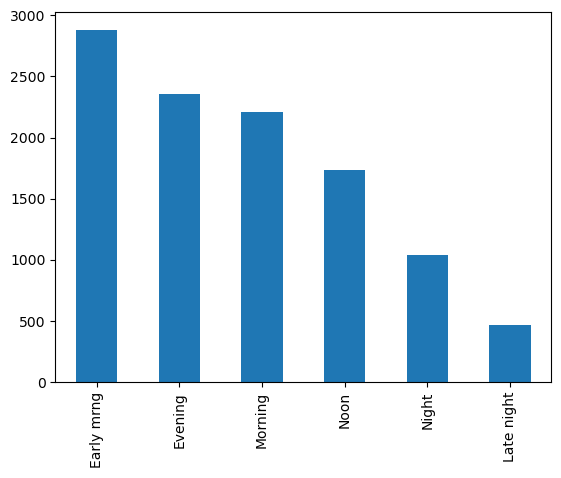

In [782]:
flight_df['Dep_Time_hour'].apply(flight_dep_time).value_counts().plot(kind='bar')

<Axes: ylabel='Dep_Time_hour'>

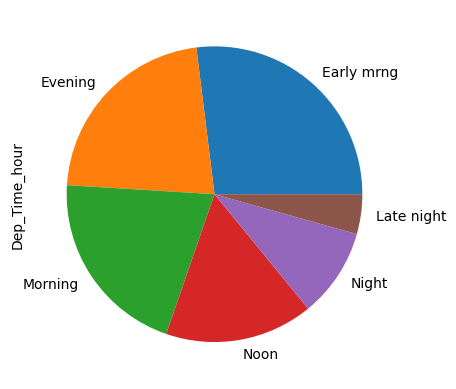

In [783]:
flight_df['Dep_Time_hour'].apply(flight_dep_time).value_counts().plot(kind='pie')

In [784]:
def preprocess_duration(x):
    if 'h' not in x:
        x='0h '+x
    elif 'm' not in x:
        x=x+' 0m'
    return x

In [785]:
flight_df['Duration']=flight_df['Duration'].apply(preprocess_duration)

In [786]:
flight_df['Duration']

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [787]:
flight_df['Duration'][0].split(' ')[0]

'2h'

In [788]:
int(flight_df['Duration'][0].split(' ')[0][0:-1])

2

In [789]:
int(flight_df['Duration'][0].split(' ')[1][0:-1])

50

In [790]:
flight_df['Duration_hours']=flight_df['Duration'].apply(lambda x:int(x.split(' ')[0][0:-1]))

In [791]:
flight_df['Duration_mins']=flight_df['Duration'].apply(lambda x:int(x.split(' ')[1][0:-1]))

In [792]:
flight_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,7662,5,1,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,13882,6,9,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,6218,5,12,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,13302,3,1,2019,16,50,21,35,4,45


In [793]:
flight_df['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

Number of flights per destination

<Axes: >

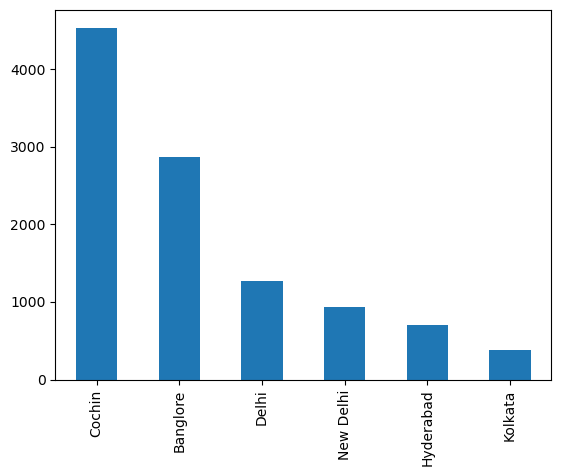

In [794]:
flight_df['Destination'].value_counts().plot(kind='bar')

In [795]:
flight_df['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

Number of flights per Source

<Axes: >

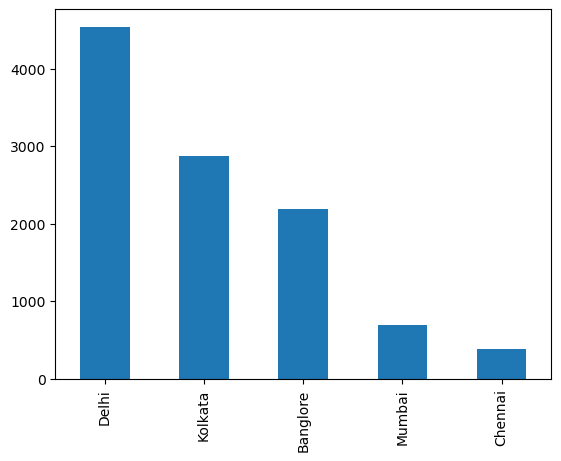

In [796]:
flight_df['Source'].value_counts().plot(kind='bar')

Count of flights as per Airlines 

<Axes: >

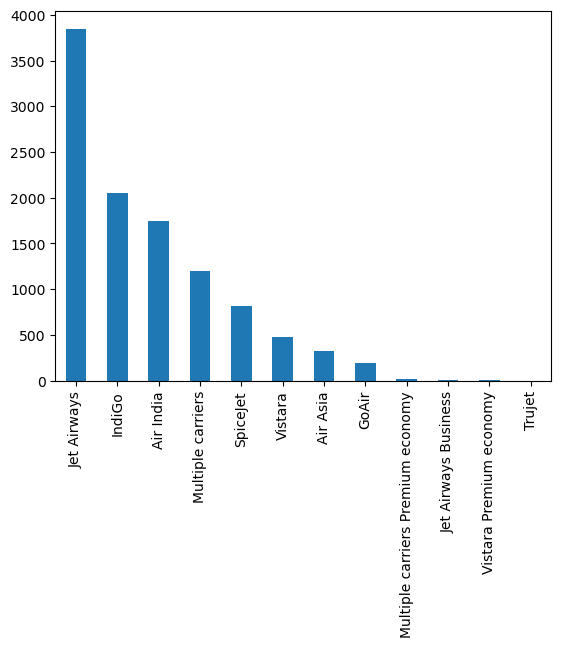

In [797]:
flight_df['Airline'].value_counts().plot(kind='bar')

In which month flights are flying more?

<Axes: >

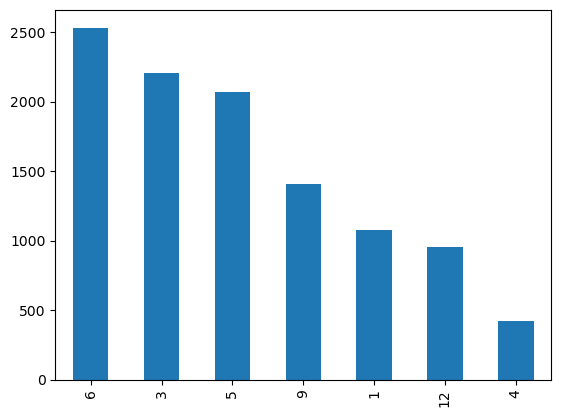

In [798]:
flight_df['journey_month'].value_counts().plot(kind='bar')

In [799]:
flight_df['Total_Duration']=flight_df['Duration_hours']*60+flight_df['Duration_mins']

In [800]:
flight_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins,Total_Duration
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,3897,24,3,2019,22,20,1,10,2,50,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,7662,5,1,2019,5,50,13,15,7,25,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,13882,6,9,2019,9,25,4,25,19,0,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,6218,5,12,2019,18,5,23,30,5,25,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,13302,3,1,2019,16,50,21,35,4,45,285


In [801]:
#Drop Duration_hours and Duration_mins and journey year 
flight_df.drop(flight_df[['Duration_hours','Duration_mins','journey_year']],axis=1,inplace=True)

In [802]:
flight_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Total_Duration
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,3897,24,3,22,20,1,10,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,7662,5,1,5,50,13,15,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,13882,6,9,9,25,4,25,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,6218,5,12,18,5,23,30,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,13302,3,1,16,50,21,35,285


# Multivariate analysis

Price as per duration and total_stops

<Axes: xlabel='Total_Duration', ylabel='Price'>

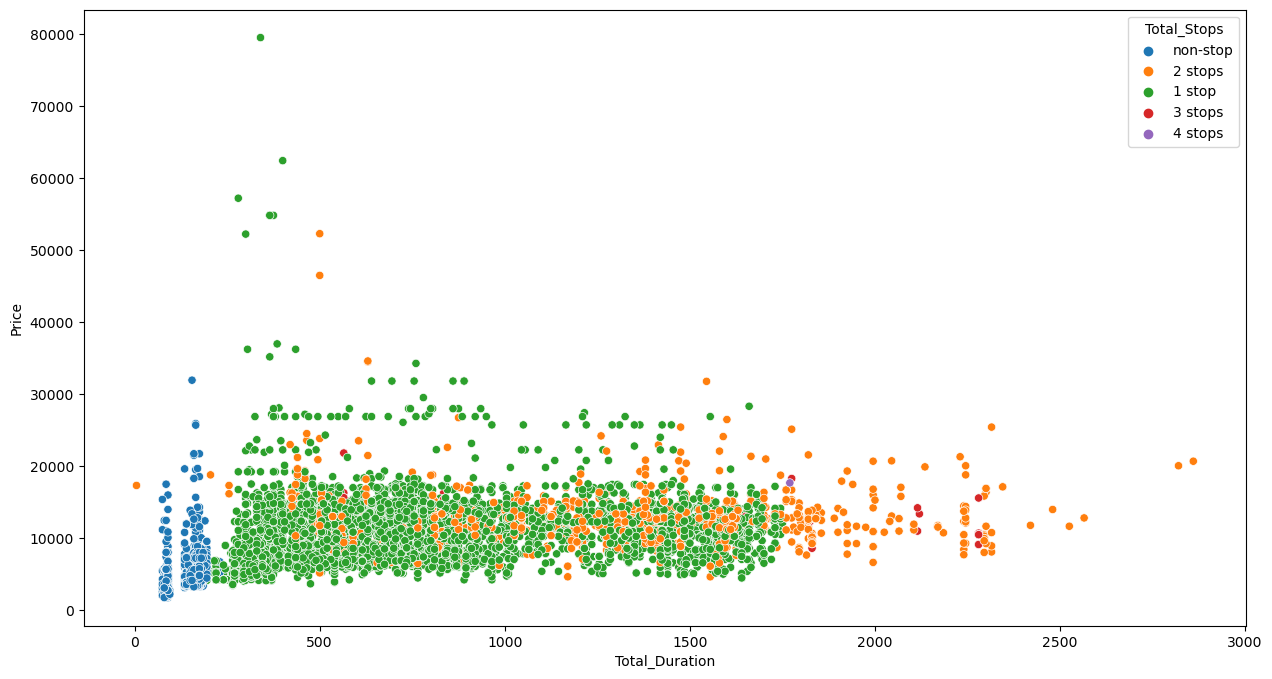

In [803]:
#price and total_duration and total_stops
plt.figure(figsize=(15,8))
sns.scatterplot(flight_df,x='Total_Duration',y='Price',hue='Total_Stops')

Price of Arirlines as per total_stops

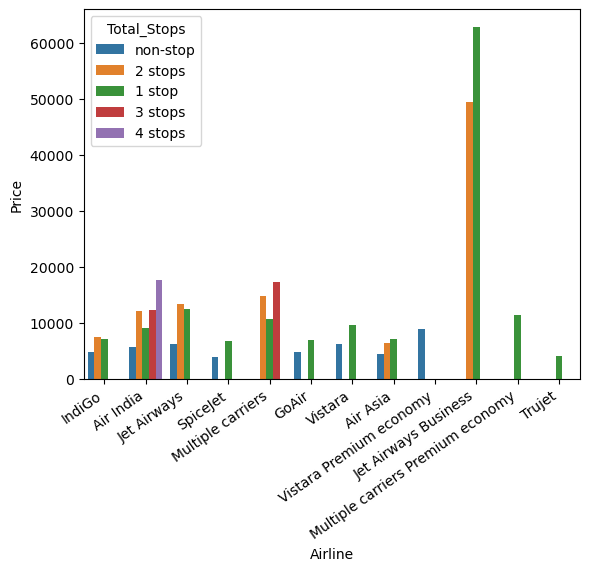

In [804]:
#price and Airline and total_stops
sns.barplot(flight_df,x='Airline',y='Price',hue='Total_Stops',ci=None)
plt.xticks(rotation=35, ha='right');

In [805]:
flight_df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

Price of flight as per source and Total_stops

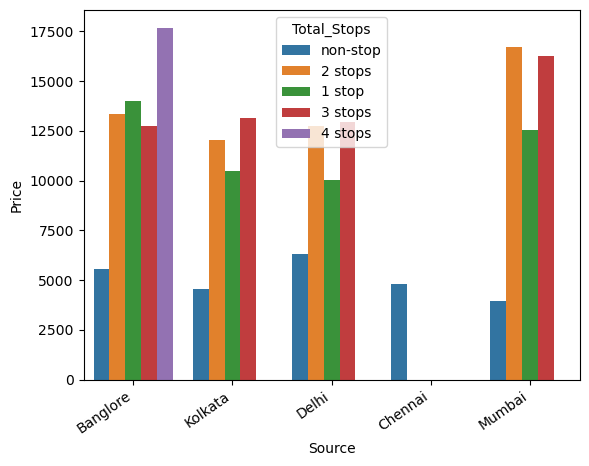

In [806]:
#price and source and total_stops and total_duration
sns.barplot(flight_df,x='Source',y='Price',hue='Total_Stops',ci=None)
plt.xticks(rotation=35, ha='right');


Price of flight as per destination and Total_stops

<Axes: xlabel='Destination', ylabel='Price'>

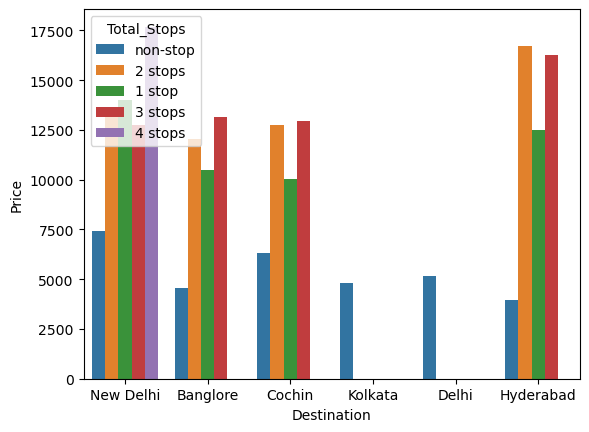

In [807]:
sns.barplot(flight_df,x='Destination',y='Price',hue='Total_Stops',ci=None)

Boxplot

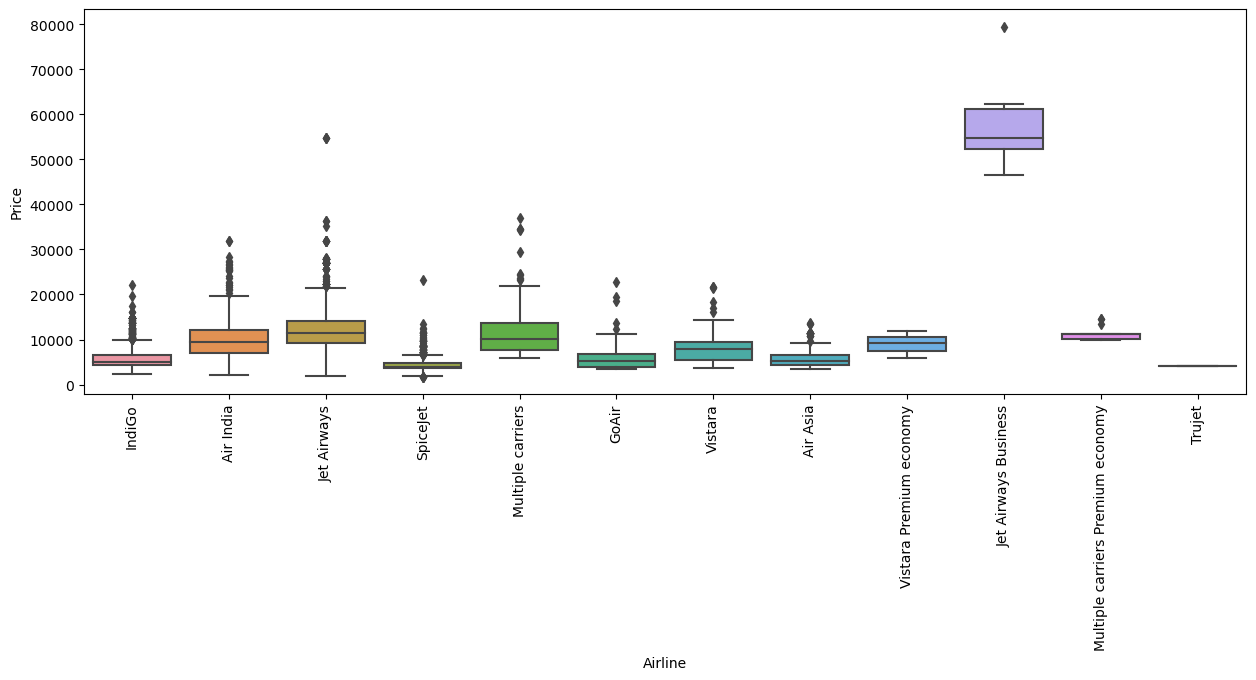

In [808]:
plt.figure(figsize=(15,5))
sns.boxplot(y='Price',x='Airline',data=flight_df)
plt.xticks(rotation='vertical')
plt.show()

Flight price as per journey_month and Airline

<Axes: xlabel='journey_month', ylabel='Price'>

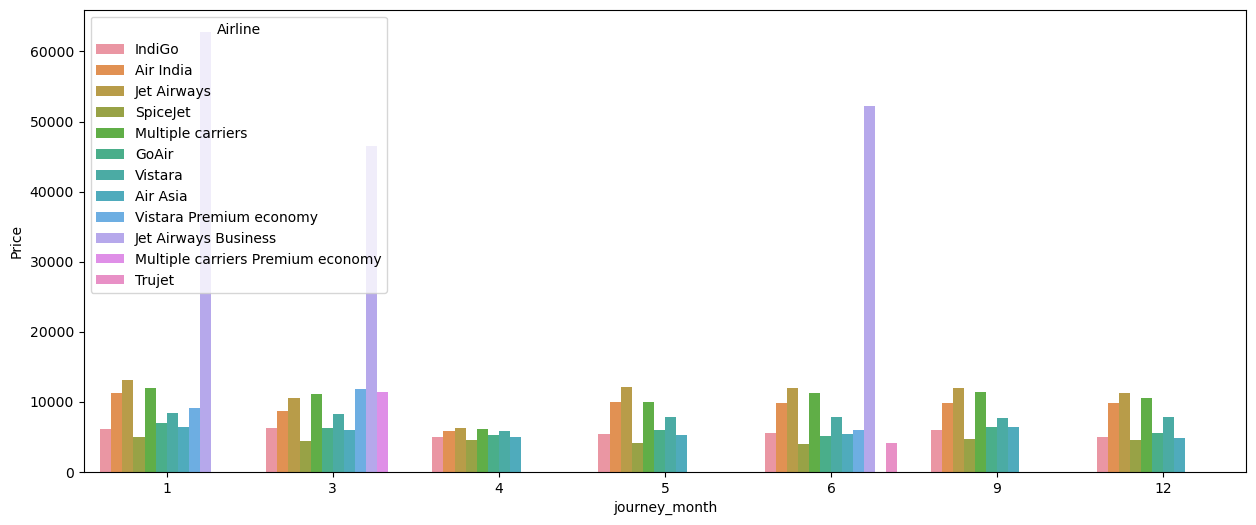

In [809]:
plt.figure(figsize=(15,6))
sns.barplot(flight_df,x='journey_month',y='Price',hue='Airline',ci=None)

Price of flight as per departure_time and Airline

<Axes: xlabel='Dep_Time_hour', ylabel='Price'>

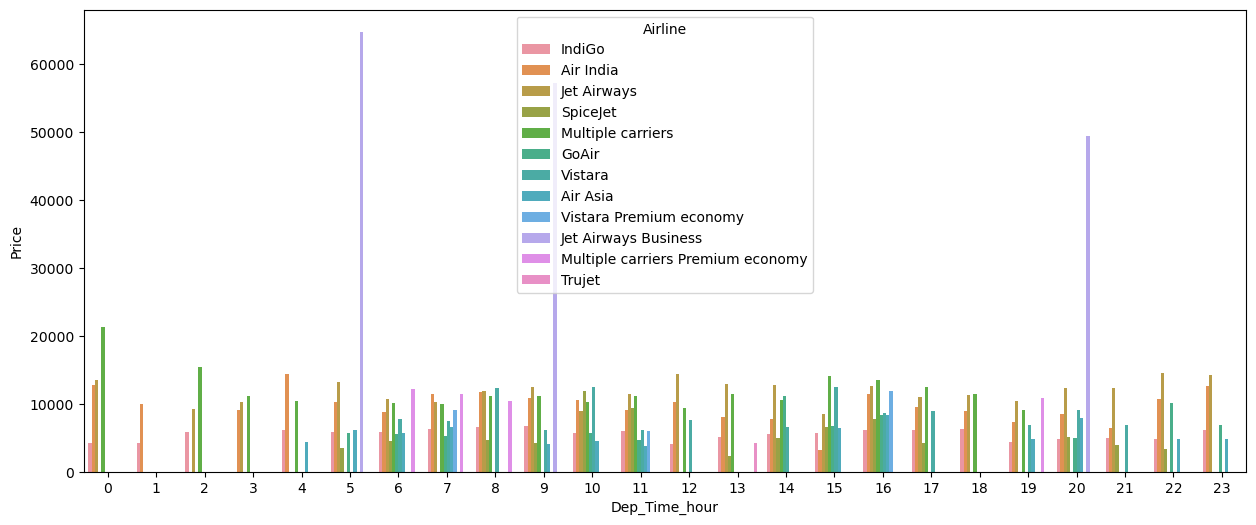

In [810]:
plt.figure(figsize=(15,6))
sns.barplot(flight_df,x='Dep_Time_hour',y='Price',hue='Airline',ci=None)

In [811]:
#Drop Duration as we already have toal_suration
flight_df.drop('Duration',axis=1,inplace=True)

In [812]:
flight_df.head(3)

,Airline,Source,Destination,Route,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Total_Duration
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,3897,24,3,22,20,1,10,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,7662,5,1,5,50,13,15,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,13882,6,9,9,25,4,25,1140


In [813]:
flight_df.drop('Route',axis=1,inplace=True)

In [814]:
flight_df.head(3)

,Airline,Source,Destination,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Total_Duration
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,170
1,Air India,Kolkata,Banglore,2 stops,7662,5,1,5,50,13,15,445
2,Jet Airways,Delhi,Cochin,2 stops,13882,6,9,9,25,4,25,1140


In [815]:
flight_df.corr()['Price']

Price                  1.000000
journey_day           -0.165448
journey_month          0.010705
Dep_Time_hour          0.006799
Dep_Time_minute       -0.024458
Arrival_Time_hour      0.024244
Arrival_Time_minute   -0.086155
Total_Duration         0.506480
Name: Price, dtype: float64

Encoding for Total_Stops

In [816]:
stops={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [817]:
flight_df['Total_Stops']=flight_df['Total_Stops'].map(stops)

In [818]:
flight_df['Total_Stops'].unique()

array([0, 2, 1, 3, 4])

In [819]:
flight_df.head(3)

,Airline,Source,Destination,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Total_Duration
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,170
1,Air India,Kolkata,Banglore,2,7662,5,1,5,50,13,15,445
2,Jet Airways,Delhi,Cochin,2,13882,6,9,9,25,4,25,1140


In [820]:
X=flight_df.drop(['Price'],axis=1)

In [821]:
y=flight_df['Price']

In [822]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [823]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor


In [824]:
transformer = ColumnTransformer(transformers=[
    ('tnf3',OneHotEncoder(sparse=False,drop='first',handle_unknown='ignore'),['Airline','Source','Destination'])
],remainder='passthrough')


In [825]:
X_train=transformer.fit_transform(X_train)

In [826]:
X_test=transformer.transform(X_test)

In [827]:
X_train_new=pd.DataFrame(X_train)

In [828]:
X_train_new.head(2)

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,6.0,1.0,11.0,25.0,19.0,15.0,470.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,3.0,17.0,45.0,20.0,45.0,180.0


In [829]:
flight_df_new=transformer.fit_transform(flight_df)

In [830]:
flight_df_new=pd.DataFrame(flight_df_new)

In [831]:
flight_df_new.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3897.0,24.0,3.0,22.0,20.0,1.0,10.0,170.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,7662.0,5.0,1.0,5.0,50.0,13.0,15.0,445.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,13882.0,6.0,9.0,9.0,25.0,4.0,25.0,1140.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,6218.0,5.0,12.0,18.0,5.0,23.0,30.0,325.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,13302.0,3.0,1.0,16.0,50.0,21.0,35.0,285.0


# RandomForestRegressor

In [832]:
ml_model=RandomForestRegressor()

In [833]:
model=ml_model.fit(X_train,y_train)

In [834]:
y_pred=model.predict(X_test)

In [835]:
y_pred

array([ 9127.14      , 18569.82216667,  5204.55333333, ...,
        5601.15      , 11076.9675    , 12455.915     ])

In [836]:
y_pred.shape,len(X_test)

((2137,), 2137)

In [837]:
from sklearn import metrics
r2_score=metrics.r2_score(y_test,y_pred)
print('r2_score: {}'.format(r2_score))
print('MSE : ', metrics.mean_squared_error(y_test,y_pred))
print('MAE : ', metrics.mean_absolute_error(y_test,y_pred))
print('RMSE : ', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))


r2_score: 0.7981419030528838
MSE :  4489952.692527177
MAE :  1184.564400686118
RMSE :  2118.9508471239196


# LinearRegression

In [838]:
from sklearn.linear_model import LinearRegression

In [839]:
ml_model2=LinearRegression()

In [840]:
model2=ml_model2.fit(X_train,y_train)

In [841]:
y_pred=model2.predict(X_test)

In [842]:
r2_score=metrics.r2_score(y_test,y_pred)
print('r2_score: {}'.format(r2_score))
print('MSE : ', metrics.mean_squared_error(y_test,y_pred))
print('MAE : ', metrics.mean_absolute_error(y_test,y_pred))
print('RMSE : ', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

r2_score: 0.6009943402299684
MSE :  8875128.436821565
MAE :  2004.7579080988837
RMSE :  2979.1153782325323


# RandomizedSearchCV

In [843]:
from sklearn.model_selection import RandomizedSearchCV

In [844]:
reg_rf=RandomForestRegressor()

In [845]:
np.linspace(start=1000,stop=1200,num=6)

array([1000., 1040., 1080., 1120., 1160., 1200.])

In [846]:
# Number of trees in random forest
n_estimators=[int(x) for x in np.linspace(start=1000,stop=1200,num=6)]

# Number of features to consider at every split
max_features=["auto", "sqrt"]

# Maximum number of levels in tree
max_depth=[int(x) for x in np.linspace(start=5,stop=30,num=4)]

# Minimum number of samples required to split a node
min_samples_split=[5,10,15,100]

In [847]:
# Create the grid or hyper-parameter space
random_grid={
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split
    
}

In [848]:
random_grid

{'n_estimators': [1000, 1040, 1080, 1120, 1160, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5, 10, 15, 100]}

In [849]:
rf_Random=RandomizedSearchCV(reg_rf,param_distributions=random_grid,cv=3,verbose=2,n_jobs=-1)

In [854]:
rf_Random.fit(X_train,y_train)

In [851]:
rf_Random.best_params_

{'n_estimators': 1080,
 'min_samples_split': 5,
 'max_features': 'sqrt',
 'max_depth': 21}

In [852]:
pred2=rf_Random.predict(X_test)

In [853]:
from sklearn import metrics
metrics.r2_score(y_test,pred2)

0.8235823488159429

RandomForestRegressor gave better r2 score.